# Classification Modelling

In this notebook, we will go into the specifics of building a classification model with QSPRpred.
The main difference with regression is in the data preparation step, where we need to define the classes we want to predict.
If you are interested in regression modelling, please refer to the [quick start tutorial](../../quick_start.ipynb).

Let's first load our example dataset.

Data preparation is identical to regression, except that we need to define the classes we want to predict.
In this example we will split the bioactivity in active and inacative compounds, based on a threshold of 6.5.

You can see that the specification of the target property now includes the threshold `th` as wel as the `task` `SINGLECLASS`.

The QSPRDataset will now include the classfied target property ({name}_class) as well as the original target property.

In [4]:
import os
from IPython.display import display
from qsprpred.data.data import QSPRDataset

os.makedirs("../../tutorial_output/data", exist_ok=True)

dataset = QSPRDataset.fromTableFile(
  	filename='../../tutorial_data/A2A_LIGANDS.tsv', 
  	store_dir="../../tutorial_output/data",
  	name="ClassificationTutorialDataset",
  	target_props=[{"name": "pchembl_value_Mean", "task": "SINGLECLASS", "th": [6.5]}],
  	random_state=42
)

display(dataset.getDF())

,SMILES,pchembl_value_Mean,Year,QSPRID,pchembl_value_Mean_class
QSPRID,,,,,
ClassificationTutorialDataset_0,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,8.68,2008.0,ClassificationTutorialDataset_0,True
ClassificationTutorialDataset_1,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...,4.82,2010.0,ClassificationTutorialDataset_1,False
ClassificationTutorialDataset_2,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,5.65,2009.0,ClassificationTutorialDataset_2,False
ClassificationTutorialDataset_3,CNC(=O)C12CC1C(n1cnc3c1nc(C#CCCCCC(=O)OC)nc3NC...,5.45,2009.0,ClassificationTutorialDataset_3,False
ClassificationTutorialDataset_4,CCCn1c(=O)c2c(nc3cc(OC)ccn32)n(CCCNC(=O)c2ccc(...,5.20,2019.0,ClassificationTutorialDataset_4,False
...,...,...,...,...,...
ClassificationTutorialDataset_4077,CNc1ncc(C(=O)NCc2ccc(OC)cc2)c2nc(-c3ccco3)nn12,7.09,2018.0,ClassificationTutorialDataset_4077,True
ClassificationTutorialDataset_4078,Nc1nc(-c2ccco2)c2ncn(C(=O)NCCc3ccccc3)c2n1,8.22,2008.0,ClassificationTutorialDataset_4078,True
ClassificationTutorialDataset_4079,Nc1nc(Nc2ccc(F)cc2)nc(CSc2nnc(N)s2)n1,4.89,2010.0,ClassificationTutorialDataset_4079,False


2495 active compounds and 1587 inactive compounds


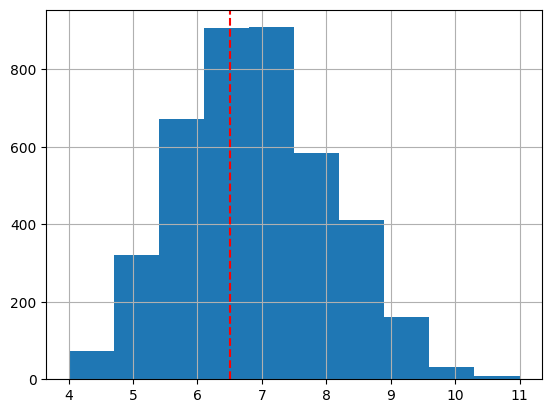

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

dataset.getProperty("pchembl_value_Mean").hist()
plt.axvline(x=6.5, color='r', linestyle='--')

num_active = dataset.getProperty("pchembl_value_Mean_class").sum()
num_inactive = dataset.getProperty("pchembl_value_Mean_class").shape[0] - num_active
print(f"{num_active} active compounds and {num_inactive} inactive compounds")

Further data preparation is identical to regression.

In [6]:
from qsprpred.data.utils.descriptorsets import FingerprintSet
from qsprpred.data.utils.descriptorcalculator import MoleculeDescriptorsCalculator
from qsprpred.data.utils.datasplitters import RandomSplit

# define the feature calculator to calculate Morgan fingerprints
feature_calculator = MoleculeDescriptorsCalculator(
    desc_sets = [FingerprintSet(fingerprint_type="MorganFP", radius=3, nBits=2048)]
)

# Specifiy random split for creating the train (80%) and test set (20%)
rand_split = RandomSplit(test_fraction=0.2, dataset=dataset)

# calculate compound features and split dataset into train and test
dataset.prepareDataset(
    split=rand_split,
    feature_calculators=[feature_calculator],
)

print(f"Number of samples train set: {len(dataset.y)}")
print(f"Number of active samples train set: {dataset.y.sum()}")
print(f"Number of samples test set: {len(dataset.y_ind)}")
print(f"Number of active samples test set: {dataset.y_ind.sum()}")

dataset.save()

Number of samples train set: 3265
Number of active samples train set: pchembl_value_Mean_class    2002
dtype: int64
Number of samples test set: 817
Number of active samples test set: pchembl_value_Mean_class    493
dtype: int64


After data preparation, the model can be trained as usual.
We just need to make sure to use a model that supports classification.
In this example we will use a K-Nearest Neighbors model.

In [7]:
from qsprpred.models.sklearn import SklearnModel
from qsprpred.models.metrics import SklearnMetric
from sklearn.neighbors import KNeighborsClassifier
from qsprpred.models.assessment_methods import CrossValAssessor, TestSetAssessor

os.makedirs("tutorial_output/models", exist_ok=True)

# This is an SKlearn model, so we will initialize it with the SklearnModel class
model = SklearnModel(
    base_dir = 'tutorial_output/models',
    data = dataset,
    alg = KNeighborsClassifier,
    name = 'ClassificationTutorialModel'
)

# We define the metric to be used for model assessment from the SklearnMetric class
score_func = SklearnMetric.getDefaultMetric(model.task)

# We can now assess the model performance on the training set using cross validation
CrossValAssessor(score_func)(model)

# and on the test set
TestSetAssessor(score_func)(model)

# Finally, we need to fit the model on the complete dataset if we want to use it further
model.fitAttached()

# and save the model
model.save()

c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_spar

'tutorial_output/models/ClassificationTutorialModel/ClassificationTutorialModel_meta.json'

To visualize the results, we will create a ROC curve for the cross validation results and the test set.

c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

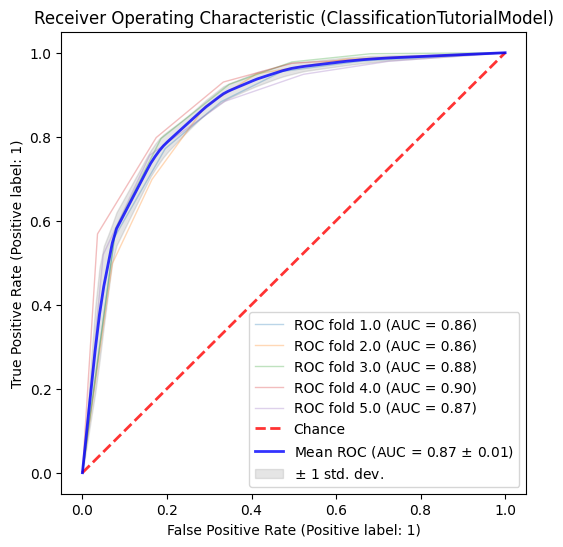

c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\helle\anaconda3\envs\qsprpred\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


<Figure size 640x480 with 0 Axes>

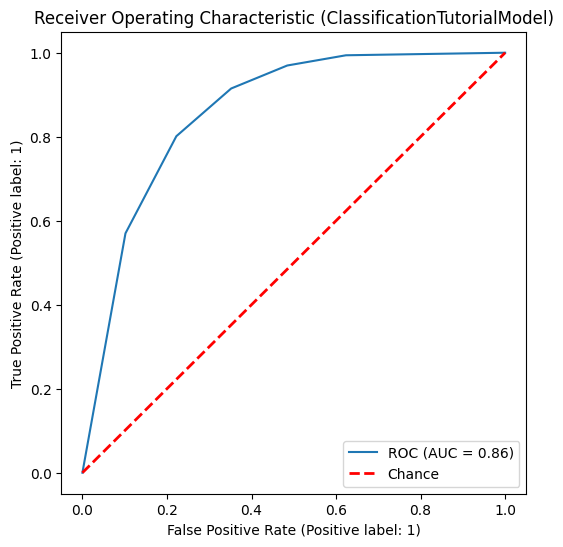

[<Figure size 600x600 with 1 Axes>]

<Figure size 640x480 with 0 Axes>

In [8]:
from qsprpred.plotting.classification import ROCPlot

plot = ROCPlot([model])
plot.make(save=True, show=True, property_name="pchembl_value_Mean_class", validation="cv")
plot.make(save=True, show=True, property_name="pchembl_value_Mean_class", validation="ind")

We can also plot a number of metrics like the f1 score, matthews correlation coefficient, precision and recall and calibration error.

/zfsdata/data/helle/01_MainProjects/03_QSPRPred/Scripts/QSPRpred/qsprpred/plotting/classification.py:590: FutureWarning: The provided callable <function mean at 0x7f953c245e40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ]].groupby("Model").aggregate(np.mean)
/zfsdata/data/helle/01_MainProjects/03_QSPRPred/Scripts/QSPRpred/qsprpred/plotting/classification.py:595: FutureWarning: The provided callable <function std at 0x7f953c246020> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  ]].groupby("Model").aggregate(np.std)
/zfsdata/data/helle/01_MainProjects/03_QSPRPred/Scripts/QSPRpred/qsprpred/plotting/classification.py:600: FutureWarning: The provided callable <function sum at 0x7f953c2447c0> is currently using DataFrameGroupBy.sum. I

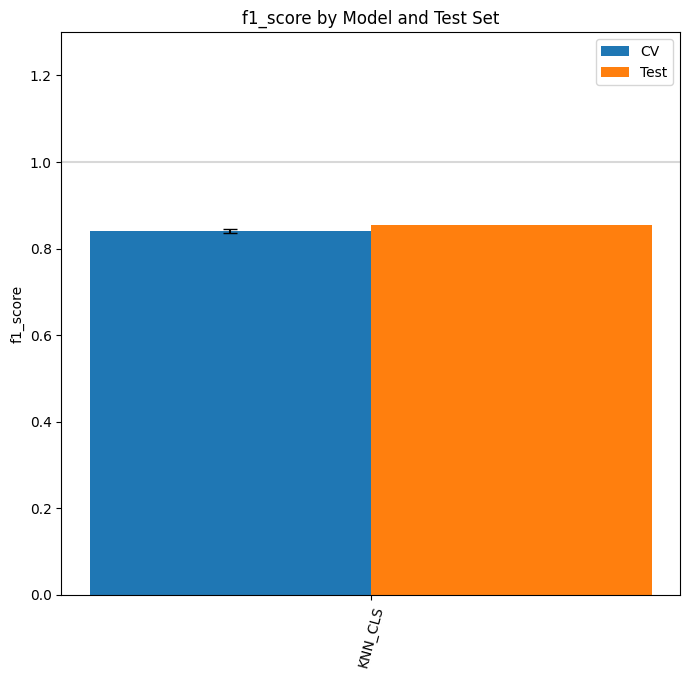

/zfsdata/data/helle/01_MainProjects/03_QSPRPred/Scripts/QSPRpred/qsprpred/plotting/classification.py:590: FutureWarning: The provided callable <function mean at 0x7f953c245e40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ]].groupby("Model").aggregate(np.mean)
/zfsdata/data/helle/01_MainProjects/03_QSPRPred/Scripts/QSPRpred/qsprpred/plotting/classification.py:595: FutureWarning: The provided callable <function std at 0x7f953c246020> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  ]].groupby("Model").aggregate(np.std)
/zfsdata/data/helle/01_MainProjects/03_QSPRPred/Scripts/QSPRpred/qsprpred/plotting/classification.py:600: FutureWarning: The provided callable <function sum at 0x7f953c2447c0> is currently using DataFrameGroupBy.sum. I

<Figure size 640x480 with 0 Axes>

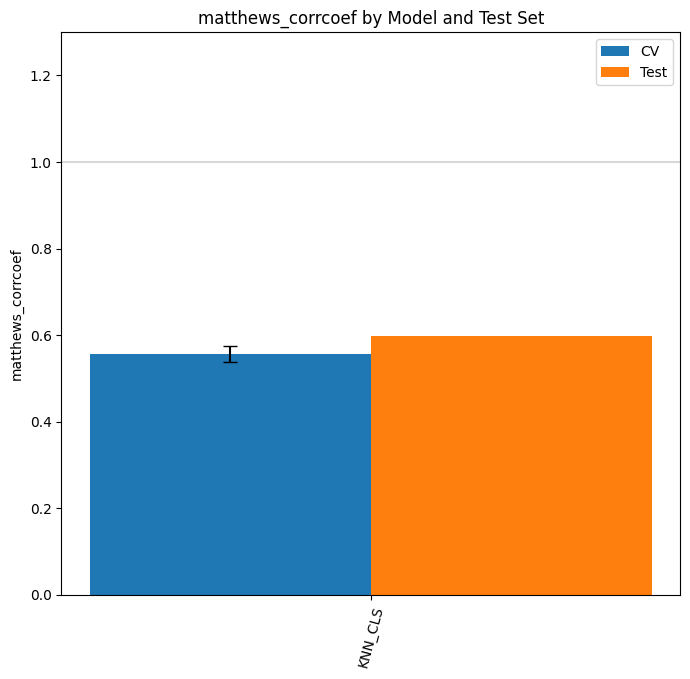

/zfsdata/data/helle/01_MainProjects/03_QSPRPred/Scripts/QSPRpred/qsprpred/plotting/classification.py:590: FutureWarning: The provided callable <function mean at 0x7f953c245e40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ]].groupby("Model").aggregate(np.mean)
/zfsdata/data/helle/01_MainProjects/03_QSPRPred/Scripts/QSPRpred/qsprpred/plotting/classification.py:595: FutureWarning: The provided callable <function std at 0x7f953c246020> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  ]].groupby("Model").aggregate(np.std)
/zfsdata/data/helle/01_MainProjects/03_QSPRPred/Scripts/QSPRpred/qsprpred/plotting/classification.py:600: FutureWarning: The provided callable <function sum at 0x7f953c2447c0> is currently using DataFrameGroupBy.sum. I

<Figure size 640x480 with 0 Axes>

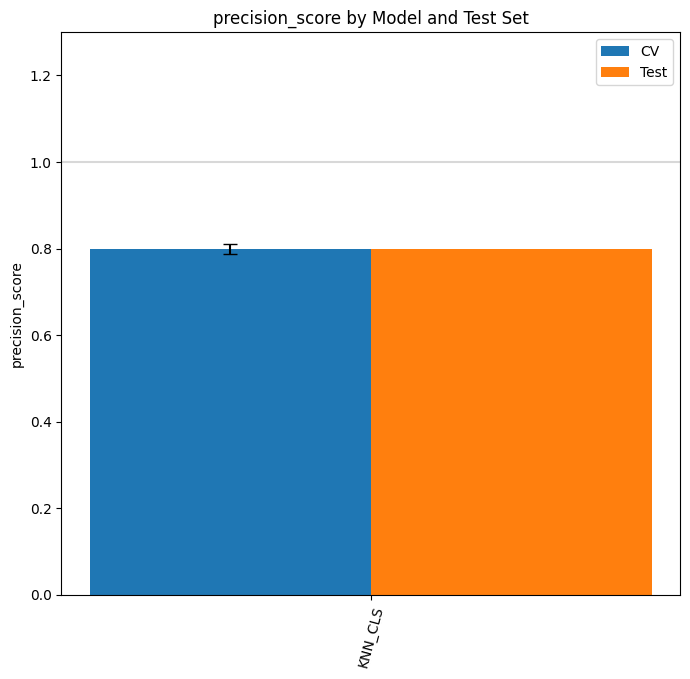

/zfsdata/data/helle/01_MainProjects/03_QSPRPred/Scripts/QSPRpred/qsprpred/plotting/classification.py:590: FutureWarning: The provided callable <function mean at 0x7f953c245e40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ]].groupby("Model").aggregate(np.mean)
/zfsdata/data/helle/01_MainProjects/03_QSPRPred/Scripts/QSPRpred/qsprpred/plotting/classification.py:595: FutureWarning: The provided callable <function std at 0x7f953c246020> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  ]].groupby("Model").aggregate(np.std)
/zfsdata/data/helle/01_MainProjects/03_QSPRPred/Scripts/QSPRpred/qsprpred/plotting/classification.py:600: FutureWarning: The provided callable <function sum at 0x7f953c2447c0> is currently using DataFrameGroupBy.sum. I

<Figure size 640x480 with 0 Axes>

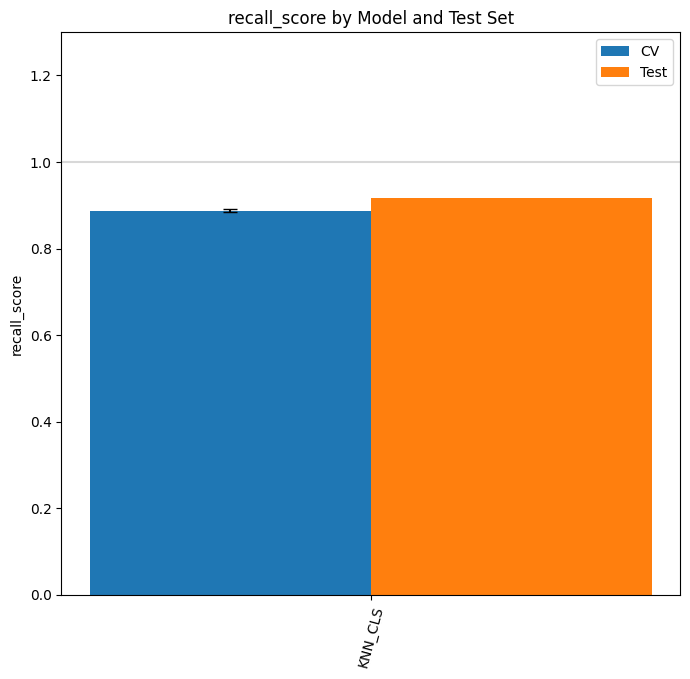

/zfsdata/data/helle/01_MainProjects/03_QSPRPred/Scripts/QSPRpred/qsprpred/plotting/classification.py:590: FutureWarning: The provided callable <function mean at 0x7f953c245e40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ]].groupby("Model").aggregate(np.mean)
/zfsdata/data/helle/01_MainProjects/03_QSPRPred/Scripts/QSPRpred/qsprpred/plotting/classification.py:595: FutureWarning: The provided callable <function std at 0x7f953c246020> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  ]].groupby("Model").aggregate(np.std)
/zfsdata/data/helle/01_MainProjects/03_QSPRPred/Scripts/QSPRpred/qsprpred/plotting/classification.py:600: FutureWarning: The provided callable <function sum at 0x7f953c2447c0> is currently using DataFrameGroupBy.sum. I

<Figure size 640x480 with 0 Axes>

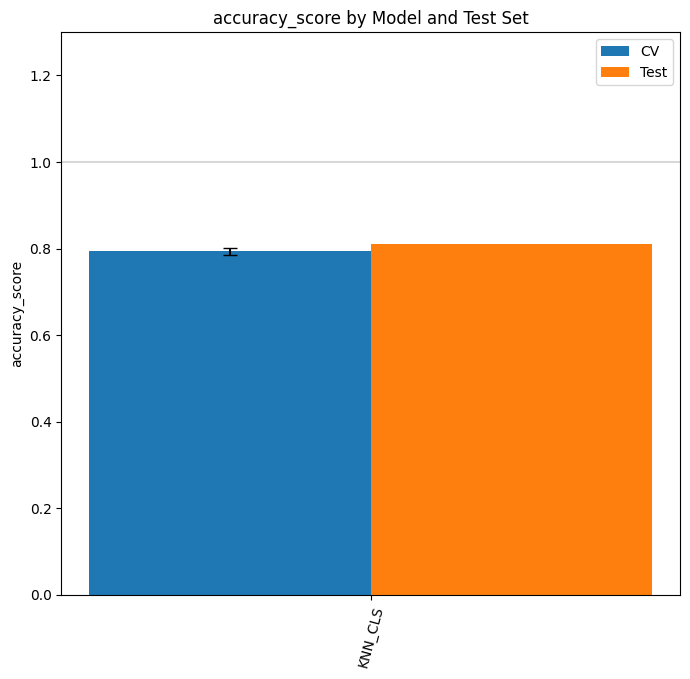

/zfsdata/data/helle/01_MainProjects/03_QSPRPred/Scripts/QSPRpred/qsprpred/plotting/classification.py:590: FutureWarning: The provided callable <function mean at 0x7f953c245e40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ]].groupby("Model").aggregate(np.mean)
/zfsdata/data/helle/01_MainProjects/03_QSPRPred/Scripts/QSPRpred/qsprpred/plotting/classification.py:595: FutureWarning: The provided callable <function std at 0x7f953c246020> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  ]].groupby("Model").aggregate(np.std)
/zfsdata/data/helle/01_MainProjects/03_QSPRPred/Scripts/QSPRpred/qsprpred/plotting/classification.py:600: FutureWarning: The provided callable <function sum at 0x7f953c2447c0> is currently using DataFrameGroupBy.sum. I

<Figure size 640x480 with 0 Axes>

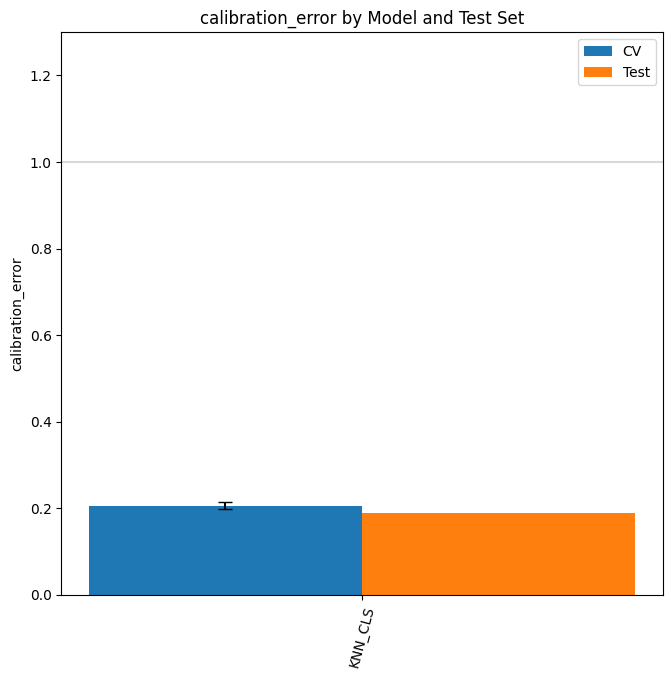

<Figure size 640x480 with 0 Axes>

In [18]:
from qsprpred.plotting.classification import MetricsPlot

plot = MetricsPlot([model])
figs, summary = plot.make(save=True, show=True, property_name="pchembl_value_Mean_class")